# BasicCNN_Model 3



## 1. Importing and loading the preprocessed dataset

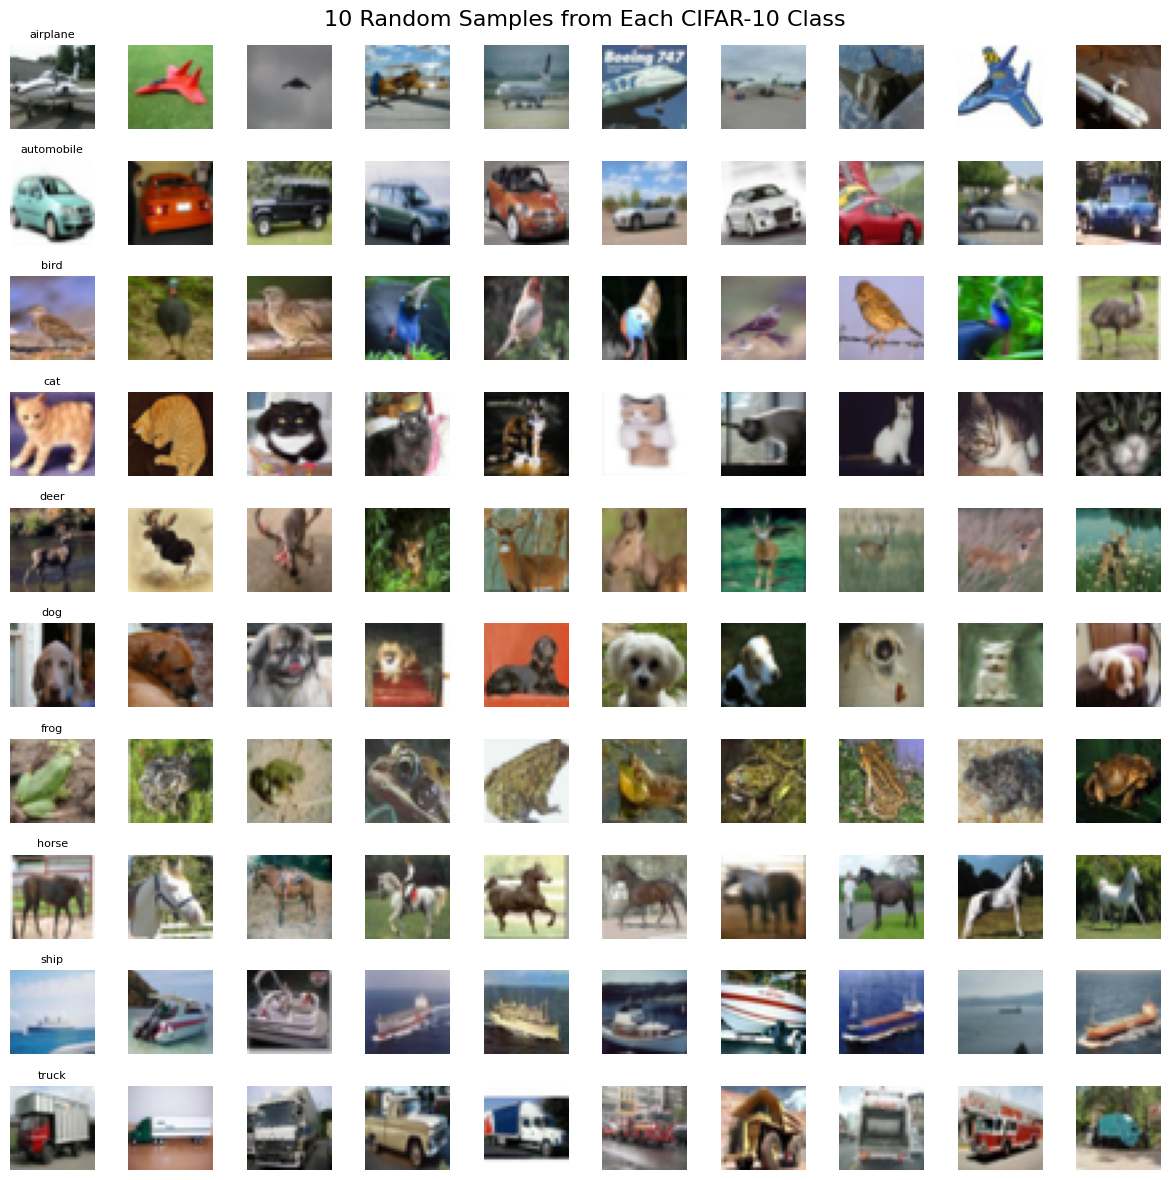

In [1]:
import nbformat
from IPython.core.interactiveshell import InteractiveShell

with open('preprocessing.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

shell = InteractiveShell.instance()
for cell in nb.cells:
    if cell.cell_type == 'code':
        shell.run_cell(cell.source)

 ## 2. Model building

In [2]:
# First we will clear the keras session
from keras.backend import clear_session
clear_session()


#### 2.1 Define callbacks to minimize overfitting during the training

In [3]:
# We will now define callbacks to control overfitting:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss'),
]


The callback `EarlyStopping` monitors the model's performance during training and stops the training process if the validation metric (by default, validation loss) does not improve for a specified number of epochs, set here by `patience=3`. This means if the model does not get better for 3 consecutive epochs, training will halt early, preventing unnecessary computation and reducing the risk of overfitting. The argument `restore_best_weights=True` ensures that after stopping, the model's weights are reverted to those from the epoch with the best validation performance, rather than the final epoch.

#### 2.2 Data Augmentation

In [ ]:
# Augment data applying horizontal flipping of input during training:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size=32)


#### 2.3 Defining model architecture

In [ ]:
#Defining the model architecture:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

model = models.Sequential()

# Layer 1: Conv → BN
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())

# Layer 2: Conv → BN → MaxPool → Dropout
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Layer 3: Conv → BN
model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())

# Layer 4: Conv → BN → MaxPool → Dropout
model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Layer 5: Conv → BN
model.add(layers.Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())

# Layer 6: Conv → BN → MaxPool → Dropout
model.add(layers.Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Layer 7: Conv → BN
model.add(layers.Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())

# Layer 8: Conv → BN → MaxPool → Dropout
model.add(layers.Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Flatten before dense layers
model.add(layers.Flatten())

# Dense Layer
model.add(layers.Dense(128, 'relu'))
model.add(layers.Dropout(0.25))

# Output Layer
model.add(layers.Dense(10, 'softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,308,586 (4.99 MB)

 Trainable params: 1,306,666 (4.98 MB)

 Non-trainable params: 1,920 (7.50 KB)

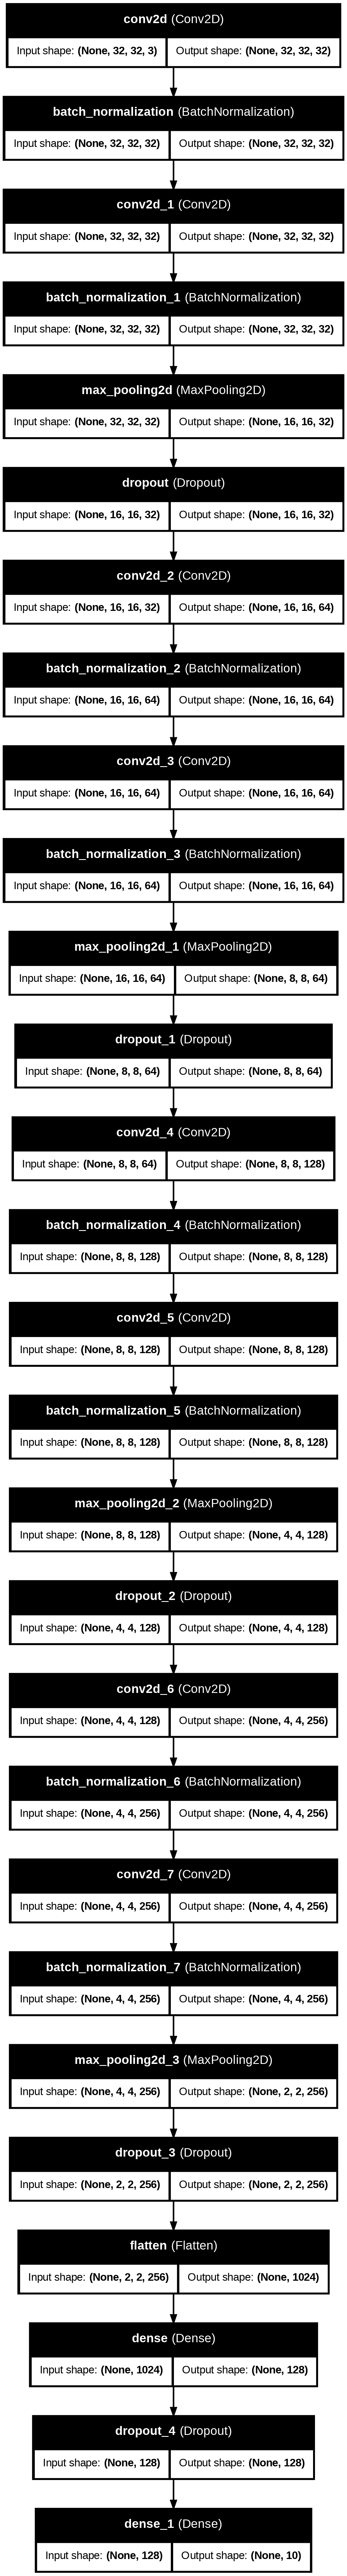

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

## 3. Model training

#### 3.1 Compiling the model

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


#### 3.2 Fitting the model to the training data

In [ ]:
# Fitting the model, including the callbacks and the number of epochs to 50:
history = model.fit(
    train_generator,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
    verbose=2
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 - 42s - 27ms/step - accuracy: 0.3155 - loss: 1.9098 - val_accuracy: 0.3676 - val_loss: 1.9362
Epoch 2/50
1563/1563 - 14s - 9ms/step - accuracy: 0.4607 - loss: 1.4885 - val_accuracy: 0.4608 - val_loss: 1.5458
Epoch 3/50
1563/1563 - 14s - 9ms/step - accuracy: 0.5380 - loss: 1.2894 - val_accuracy: 0.5317 - val_loss: 1.3554
Epoch 4/50
1563/1563 - 14s - 9ms/step - accuracy: 0.5980 - loss: 1.1359 - val_accuracy: 0.6241 - val_loss: 1.0588
Epoch 5/50
1563/1563 - 14s - 9ms/step - accuracy: 0.6382 - loss: 1.0296 - val_accuracy: 0.6686 - val_loss: 0.9420
Epoch 6/50
1563/1563 - 13s - 8ms/step - accuracy: 0.6704 - loss: 0.9350 - val_accuracy: 0.6686 - val_loss: 0.9777
Epoch 7/50
1563/1563 - 21s - 13ms/step - accuracy: 0.6970 - loss: 0.8642 - val_accuracy: 0.7178 - val_loss: 0.8093
Epoch 8/50
1563/1563 - 13s - 9ms/step - accuracy: 0.7168 - loss: 0.8116 - val_accuracy: 0.7125 - val_loss: 0.8406
Epoch 9/50
1563/1563 - 14s - 9ms/step - accuracy: 0.7396 - loss: 0.7539 - val_accuracy: 0.7581 - 

#### 3.3 Plot training history (loss/accuracy curves)

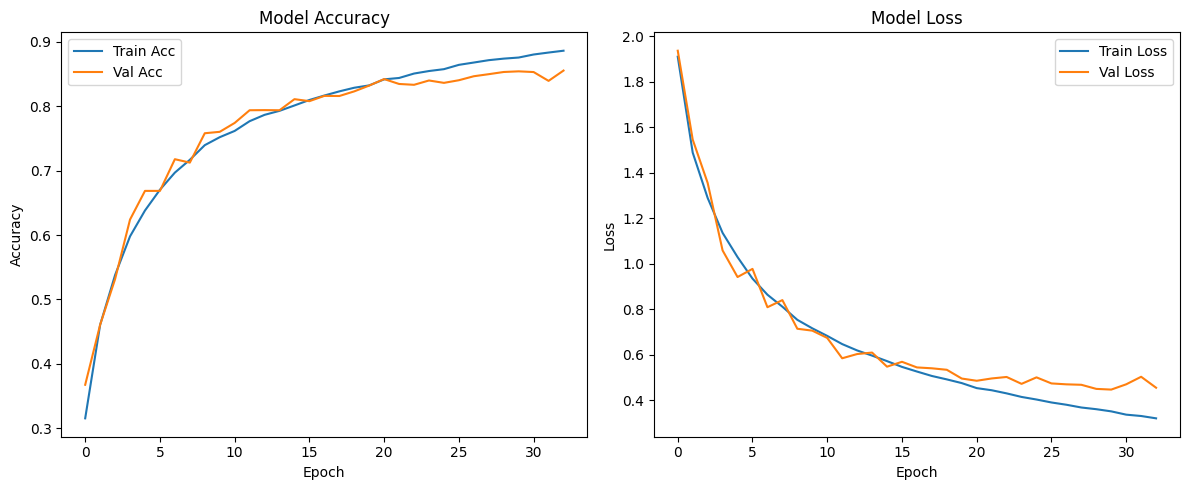

In [10]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 4. Model evaluation

#### 4.1 Evaluate on the test set

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

Test accuracy: 0.8542
Test loss: 0.4475


#### 4.2 Calculate metrics: Precision, recall, F1 score

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Get predictions from the model
y_pred = model.predict(x_test)

# Convert one-hot encoded labels and predictions to class indices
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score, using 'macro' average, as the classes are balanced (6k images per class)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Precision: 0.8546
Recall: 0.8542
F1 Score: 0.8539


#### 4.3 Confusion matrix and classification report

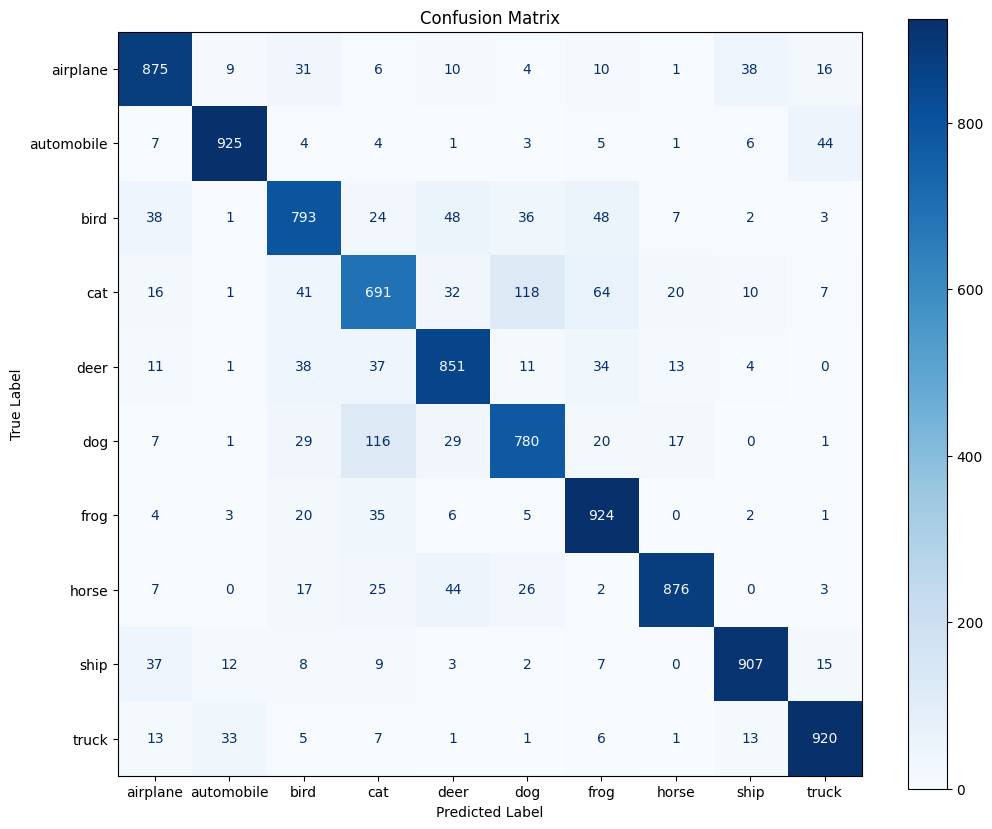

Classification Report:
              precision    recall  f1-score   support

    airplane       0.86      0.88      0.87      1000
  automobile       0.94      0.93      0.93      1000
        bird       0.80      0.79      0.80      1000
         cat       0.72      0.69      0.71      1000
        deer       0.83      0.85      0.84      1000
         dog       0.79      0.78      0.79      1000
        frog       0.82      0.92      0.87      1000
       horse       0.94      0.88      0.90      1000
        ship       0.92      0.91      0.92      1000
       truck       0.91      0.92      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [13]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

## 5. Results and conclusion

Initially, when we tried applying data augmentation to this model, we observed a decrease in performance compared to the model without augmentation, even though the network architecture remained the same. We experimented with several different data augmentation techniques and combinations, but the performance consistently lagged behind the non-augmented model.

After some research, we found that the reason for this counter-intuitive result might be related to applying overly complex data augmentation, especially to datasets like CIFAR-10, which consist of small, low-resolution images. Excessive transformations can potentially distort the images in ways that make them harder for the model to learn from.

Therefore, we decided to simplify the data augmentation strategy significantly. We ended up using only horizontal flipping, which is a relatively simple transformation. With just this single augmentation technique, we saw an improvement in the model's accuracy and a decrease in the test loss, indicating that this level of augmentation was beneficial without being detrimental to learning.

In the end, we achieved an accuracy of 0.8542 and a test_loss of 0.4475. This has been the best metrics we've achieved so far, which are quite decent. Also, we can see that there is no significant overfitting due to the convergence between training and validation curves in both accuracy and loss graphs.

Finally, we can see that the most problematic classes in terms of accuracy are 'cats' and 'dogs', which the model confuses more often. We  are going to apply transfer learning, to see if these two classes are improved, as well as the overall model accuracy.


